# Coursera Data Science - Capstone Project - Final

In [1]:
import pandas   as pd
import numpy    as np
import urllib.request  as request

import json                               # library to handle JSON files
import matplotlib.cm     as cm            # Matplotlib plotting modules
import matplotlib.colors as colors
import folium
from folium.features import DivIcon
import matplotlib        as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler
from geopy.geocoders       import Nominatim     # convert an address into latitude and longitude values
from pandas.io.json        import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster       import KMeans         # import k-means from clustering stage
from os import path


## Get Source Data
### The file is store in GIT hub
#### You can find more Australia Statistic Data from the following URL:
##### https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/1410.02013-18?OpenDocument

In [2]:
# Load OZ_Population.xls (Population and People, ASGS, 2011 to 2018 )

url_src  = 'https://www.abs.gov.au/AUSSTATS/subscriber.nsf/log?openagent&14100ds0001_2011-18.xls&1410.0&Data%20Cubes&A104AABC499358F0CA2583FC00186495&0&2013-18&17.05.2019&Latest'
file_src = 'OZ_Population.xls'

if not path.exists( file_src ):
   print('Please wait, downloading {} from ABS .....'.format(file_src))
   request.urlretrieve(url_src, file_src)  

print('Loading {} .....'.format(file_src))
data_src1 = pd.read_excel(url_src, skiprows=7)
print('Load {} is complete with {} rows!\n'.format(file_src, data_src1.shape[0]))

Loading OZ_Population.xls .....
Load OZ_Population.xls is complete with 21679 rows!



In [3]:
# Load OZ_Edu_Empl.xls (Education and Employment, ASGS, 2011 to 2018)

url_src  = 'https://www.abs.gov.au/AUSSTATS/subscriber.nsf/log?openagent&14100ds0007_2011-18.xls&1410.0&Data%20Cubes&EE750E055289F56CCA2583FC00186A66&0&2013-18&17.05.2019&Latest'
file_src = 'OZ_Edu_Empl.xls'

if not path.exists( file_src ):
   print('Please wait, downloading {} from ABS .....'.format(file_src))
   request.urlretrieve(url_src, file_src)  

print('Loading {} .....'.format(file_src))
data_src2 = pd.read_excel(file_src,skiprows=6)
print('Load {} is complete with {} rows!\n'.format(file_src, data_src2.shape[0]))
data_src2.tail(9).tail(2)

Loading OZ_Edu_Empl.xls .....
Load OZ_Edu_Empl.xls is complete with 18803 rows!



,Unnamed: 0,Unnamed: 1,Unnamed: 2,4 year olds enrolled in preschool or in a preschool program,5 year olds enrolled in preschool or in a preschool program,Enrolled in preschool,Enrolled in a preschool program within a long day care centre,Children enrolled across more than one provider type,Total enrolled in a preschool program,Less than 15 hours,...,Number of Employee Jobs - Public administration and safety,Number of Employee Jobs - Education and training,Number of Employee Jobs - Health care and social assistance,Number of Employee Jobs - Arts and recreation services,Number of Employee Jobs - Other services,Number of Employee Jobs - Total,Labour Force,Unemployed,Unemployment rate,Participation rate
18801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18802,© Commonwealth of Australia 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleansing for OZ_Population.xls

In [4]:

Col_Nbrs  = list(range(0,3)) + [72] + list(range(85, 106))
Col_Names = ['CODE','Suburb','YEAR','Median Age','Born_in_Oceania_Ex_OZ','Born_in_North_West_Europe','Born_in_Southern_Eastern_Europe','Born_in_North_Africa_Middle_East','Born_in_South_East_Asia','Born_in_North_East_Asia','Born_in_Southern_Central_Asia','Born_in_America','Born_in_Sub_Saharan_Africa','Born_Overseas','Relg_Buddhism','Relg_Christianity','Relg_Hinduism','Relg_Islam','Relg_Judaism','Relg_Other','Relg_Secular','Relg_not_stated','Residency_Citizen','Residency_not_Citizen','Residency_not_Stated']

data1 = data_src1.iloc[:, Col_Nbrs]
data1.columns = Col_Names


In [5]:
data_src1.tail(10).head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,0-14 years,15-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,...,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106
21669,901031003,Jervis Bay,2018,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
21670,901041004,Norfolk Island,2016,17.2,6.3,6.7,13,15.4,17.6,14.2,...,0.3,-,-,0.4,27.3,9.5,81.5,11.6,6.9,48.7
21671,901041004,Norfolk Island,2017,16.7,7.4,6.2,12.2,14.8,18.3,15,...,-,-,-,-,-,-,-,-,-,-


In [6]:
code_num  = data1.CODE.apply(pd.to_numeric, errors='coerce')
code_filt = (code_num > 200000000) & (code_num < 300000000)   # Melbourne Data
data_pop  = data1[code_filt].reset_index(drop=True)
print(data_pop.shape)
data_pop.tail(11).head(2)

(3665, 25)


,CODE,Suburb,YEAR,Median Age,Born_in_Oceania_Ex_OZ,Born_in_North_West_Europe,Born_in_Southern_Eastern_Europe,Born_in_North_Africa_Middle_East,Born_in_South_East_Asia,Born_in_North_East_Asia,...,Relg_Christianity,Relg_Hinduism,Relg_Islam,Relg_Judaism,Relg_Other,Relg_Secular,Relg_not_stated,Residency_Citizen,Residency_not_Citizen,Residency_not_Stated
3654,217041479,Warrnambool - North,2016,38,1.3,2.7,0.4,0.2,0.7,1.1,...,57.5,0.3,0.2,-,0.2,31.5,9.6,89.4,3.9,6.7
3655,217041479,Warrnambool - North,2017,38.1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


## Data Cleansing for OZ_Edu_Empl.xls

In [10]:
Col_Names = ['CODE','YEAR','Edu_PostGraduate','Edu_Diploma','Edu_Bachelor','Edu_Adv_Dipl','Unempl_Rate']
Col_Nbrs  = [data_src2.columns[0],data_src2.columns[2],'Postgraduate Degree','Graduate Diploma, Graduate Certificate','Bachelor Degree','Advanced Diploma, or Diploma ','Unemployment rate']

data2 = data_src2[Col_Nbrs]
data2.columns = Col_Names
data2.shape

(18803, 7)

In [11]:
code_num  = data2.CODE.apply(pd.to_numeric, errors='coerce')
code_filt = (code_num > 20000000) & (code_num < 300000000)   # Melbourne Data
data_edu  = data2[code_filt].reset_index(drop=True)
print(data_edu.shape)
data_edu.head(3)

(7184, 7)


,CODE,YEAR,Edu_PostGraduate,Edu_Diploma,Edu_Bachelor,Edu_Adv_Dipl,Unempl_Rate
0,101021007,2011,4.4,2.7,12.3,7.7,4
1,101021007,2012,-,-,-,-,-
2,101021007,2013,-,-,-,-,-


## Merge OZ_Population.xls and OZ_Edu_Empl.xls into a single table
###  Use Year 2016 as it has the most complete data

In [12]:
data_merged_tmp = data_pop.join(data_edu.set_index(['CODE','YEAR']), on=['CODE','YEAR'], how='left')

data = data_merged_tmp[ data_merged_tmp['YEAR'] == 2016]
data.reset_index(drop=True,inplace=True)



In [13]:
#### Replace all missing values with Zeroes #####
data.iloc[:,3:].replace(to_replace = '-', value = 0, inplace=True)

data.drop( 'Born_Overseas', axis = 1)

print('Number of Rows After Merge  :', data_merged_tmp.shape[0])
print('Number of Rows For Year 2016:', data.shape[0])

data[['Relg_Judaism']].head()

Number of Rows After Merge  : 3665
Number of Rows For Year 2016: 459


/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Relg_Judaism
0,0.1
1,0.1
2,0.1
3,0
4,0


In [14]:
data.columns[3:]

Index(['Median Age', 'Born_in_Oceania_Ex_OZ', 'Born_in_North_West_Europe',
       'Born_in_Southern_Eastern_Europe', 'Born_in_North_Africa_Middle_East',
       'Born_in_South_East_Asia', 'Born_in_North_East_Asia',
       'Born_in_Southern_Central_Asia', 'Born_in_America',
       'Born_in_Sub_Saharan_Africa', 'Born_Overseas', 'Relg_Buddhism',
       'Relg_Christianity', 'Relg_Hinduism', 'Relg_Islam', 'Relg_Judaism',
       'Relg_Other', 'Relg_Secular', 'Relg_not_stated', 'Residency_Citizen',
       'Residency_not_Citizen', 'Residency_not_Stated', 'Edu_PostGraduate',
       'Edu_Diploma', 'Edu_Bachelor', 'Edu_Adv_Dipl', 'Unempl_Rate'],
      dtype='object')

## Get Latitude and Longitude of all suburbs

In [15]:
file_src = 'GeoLoc.csv'
geolocator = Nominatim(user_agent="Capstone")

#######
### Get Geo Location if the GeoLoc.csv does not exist ###
#######
if not path.exists( file_src ):
   print('Please wait, getting Geo Location from Nominatim .....')
   
   GeoLoc = {}
   for suburb in data['Suburb']:
      sub_vic = suburb + ", Vic"
      loc = geolocator.geocode(sub_vic)
      if loc is not None:
         GeoLoc[suburb] = [loc.latitude, loc.longitude]
    
   GeoLoc_dict = pd.DataFrame.from_dict(GeoLoc, orient='index')
   GeoLoc_dict.columns = ['latitude', 'longitude']
   GeoLoc_dict.to_csv('GeoLoc.csv')

GeoLoc = pd.read_csv(file_src, index_col=0)    
GeoLoc.head()

cbd_loc = geolocator.geocode("City of Melbourne, Vic")

## Define a Function to Get Columns based on the interest

In [17]:
def GetColumns ( p_interest ):
   
    cols = []
    for col in data.columns:
        if re.match(p_interest + '.*', col) :
           cols = cols + [col]
    return cols

## Do Clustering based on Religion based

In [18]:
#cols = GetColumns('Relg')
cols = ['Relg_Christianity', 'Relg_Buddhism', 'Relg_Hinduism', 'Relg_Islam', 'Relg_Judaism']

### Normalized the data

In [19]:
from sklearn.preprocessing import scale

religion_df = pd.DataFrame()

for i in range( len(cols) ):
   col_nm = cols[i]
   religion_df[ col_nm ] = scale( data[ col_nm ].astype(float) )
   
   v_min   = religion_df[ col_nm ].min()
   v_range = religion_df[ col_nm ].max() - v_min 
   religion_df[ col_nm ] = ( religion_df[ col_nm ] - v_min ) / v_range
    
    


### Define Procedure to do Clustering

In [20]:
def Clustering_n ( p_clus, data_df ):
    
    clust_k_means = KMeans(init = "k-means++", n_clusters = p_clus, n_init = 22)
    clust_k_means.fit( data_df )
    
    #data_df.iloc[:,0:n_clus] = data_df.iloc[:,0:n_clus].astype(float)
    data_df = data_df.astype(float)
    data_df['Cluster'] = clust_k_means.labels_
    data_df_grp = data_df.groupby(['Cluster'], as_index = False ).mean() 
    
    return data_df_grp, clust_k_means.labels_
   

### Four Clusters

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9180837470>,
      dtype=object)

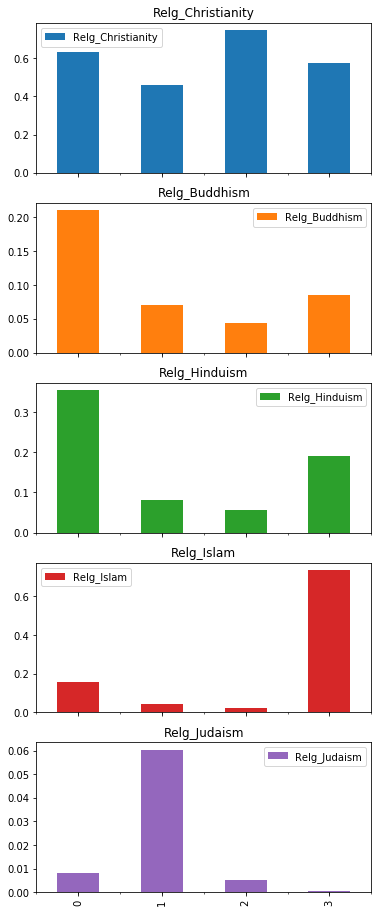

In [21]:
religion_sum, v_clust = Clustering_n(4, religion_df)
religion_sum.iloc[:,1:].plot(kind='bar', figsize=(6,16), subplots=True)

### Six Clusters

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f91819da470>,
      dtype=object)

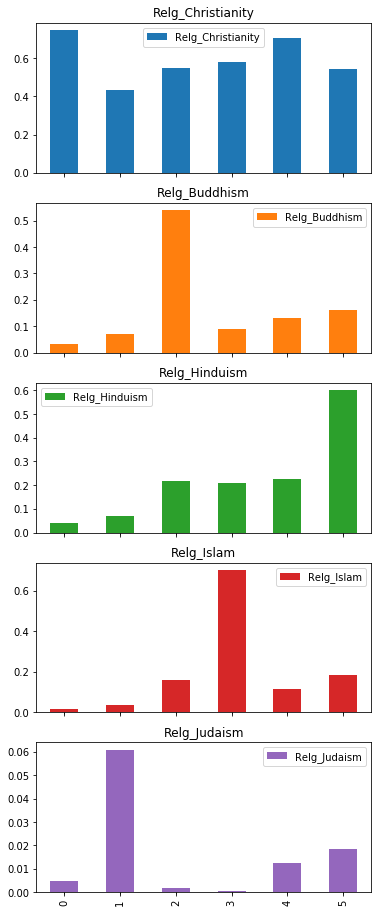

In [22]:
religion_sum, v_clust = Clustering_n(6, religion_df)
religion_sum.iloc[:,1:].plot(kind='bar', figsize=(6,16), subplots=True)

### Seven Clusters

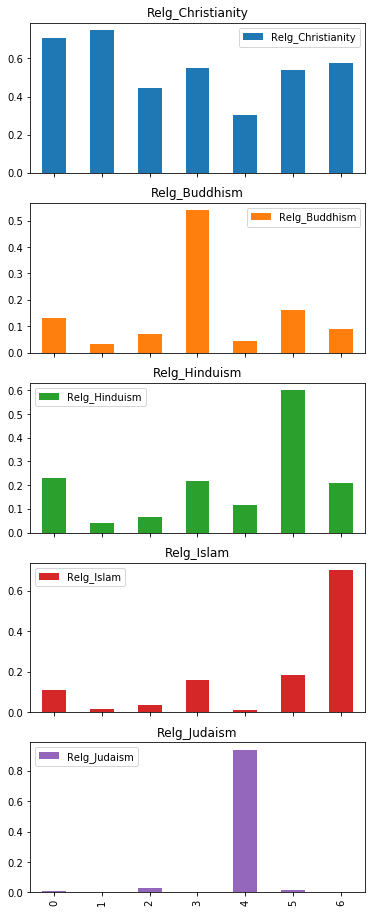

In [23]:
religion_sum, v_clust = Clustering_n(7, religion_df)
ax = religion_sum.iloc[:,1:].plot(kind='bar', figsize=(6,16), subplots=True)

Text(0, 0.5, 'Normalized Percentage')

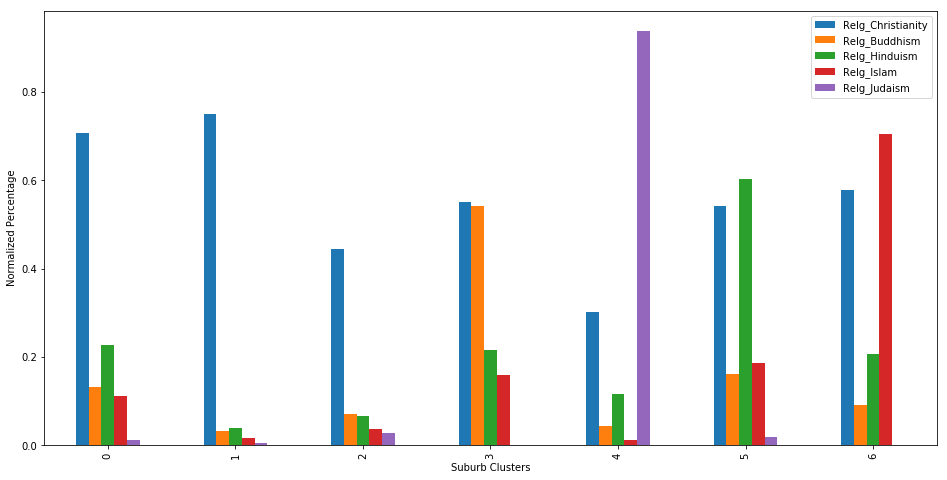

In [24]:
ax = religion_sum.iloc[:,1:].plot(kind='bar', figsize=(16,8), subplots=False)
ax.set_xlabel('Suburb Clusters')
ax.set_ylabel('Normalized Percentage')

In [25]:
rainbow = ['#00CC66','#FFFF00','#996699','#6699FF','#778855','#CC3300','#55FF33']

map_relg = folium.Map( location=[cbd_loc.latitude, cbd_loc.longitude], 
                       zoom_start=11, min_zoom = 9, max_zoom=12 )

for i in range( religion_df.shape[0] ):
   suburb  = data.loc[i,['Suburb']][0]
   
   if suburb not in GeoLoc.index:
      continue
    
   cluster = v_clust[i]
   cluster_txt = str(cluster)
   colour  = rainbow[cluster] 

   vPopUp  = cluster_txt + ':' + suburb
   geo_loc = [GeoLoc.loc[suburb][0], GeoLoc.loc[suburb][1]]

   folium.CircleMarker(geo_loc, 8, color=colour, fill=True, fill_color=colour,popup = vPopUp, fill_opacity=0.7).add_to(map_relg)
 
map_relg

## Clustering based on The Country of Origin

In [26]:
cols = GetColumns('Born')
cols.remove('Born_Overseas')
cols

['Born_in_Oceania_Ex_OZ',
 'Born_in_North_West_Europe',
 'Born_in_Southern_Eastern_Europe',
 'Born_in_North_Africa_Middle_East',
 'Born_in_South_East_Asia',
 'Born_in_North_East_Asia',
 'Born_in_Southern_Central_Asia',
 'Born_in_America',
 'Born_in_Sub_Saharan_Africa']

In [27]:
born_df = pd.DataFrame()

for i in range( len(cols) ):
   col_nm = cols[i]
   born_df[ col_nm ] = scale( data[ col_nm ].astype(float) )

   v_min   = born_df[ col_nm ].min()
   v_range = born_df[ col_nm ].max() - v_min
   born_df[ col_nm ] = ( born_df[ col_nm ] - v_min ) / v_range

In [28]:
#data.drop( 'Born_Overseas', axis = 1)
born_df.head(3)

,Born_in_Oceania_Ex_OZ,Born_in_North_West_Europe,Born_in_Southern_Eastern_Europe,Born_in_North_Africa_Middle_East,Born_in_South_East_Asia,Born_in_North_East_Asia,Born_in_Southern_Central_Asia,Born_in_America,Born_in_Sub_Saharan_Africa
0,0.164179,0.215278,0.039409,0.013986,0.037037,0.040230,0.087774,0.076923,0.145161
1,0.179104,0.277778,0.039409,0.010490,0.026455,0.031609,0.050157,0.134615,0.080645
2,0.104478,0.250000,0.039409,0.006993,0.021164,0.011494,0.025078,0.115385,0.064516


## Find the Optimal k of Eblow Method
### Using Distortion and Inertia

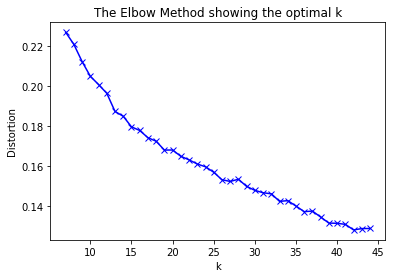

In [29]:
from scipy.spatial.distance import cdist

distortions = []
inertias = [] 
K = range(7,45)

for i in K:
    clust_k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 22)
    clust_k_means.fit( born_df )
    distortions.append(sum(np.min(cdist(born_df, clust_k_means.cluster_centers_, 'euclidean'), axis=1)) / born_df.shape[0])
    inertias.append(clust_k_means.inertia_) 

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
  

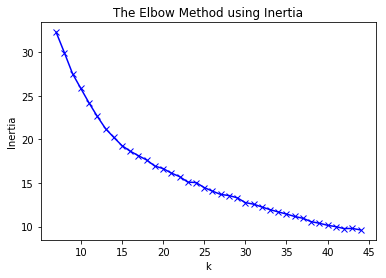

In [30]:
# Plot the elbow
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()
  

### Four Clusters Country of Origins - k = 16

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f91814cf898>,
      dtype=object)

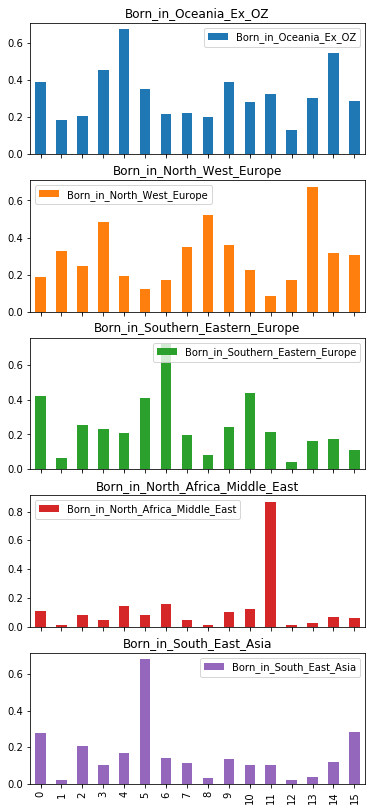

In [31]:
cluster_k = 16
born_sum, v_clust = Clustering_n(cluster_k, born_df)
born_sum.iloc[:,1:6].plot(kind='bar', figsize=(6,14), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f917de42eb8>,
      dtype=object)

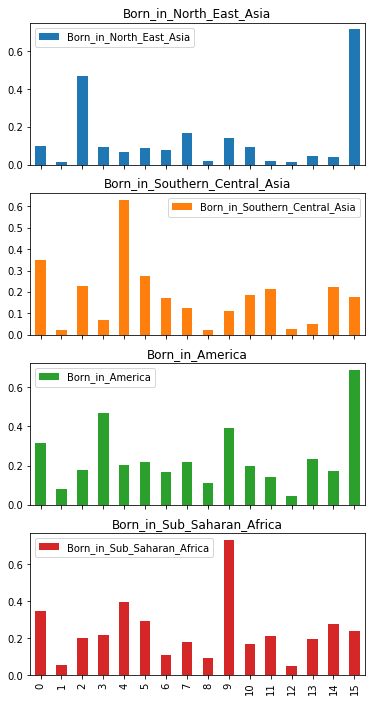

In [32]:
born_sum.iloc[:,6:].plot(kind='bar', figsize=(6,12), subplots=True)

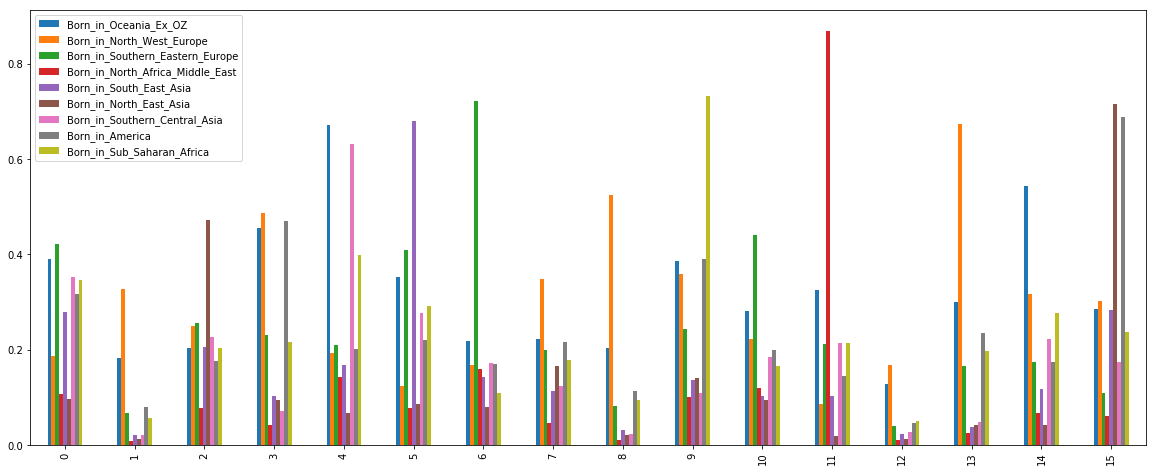

In [33]:
born_sum.iloc[:,1:].plot(kind='bar', figsize=(20,8), subplots=False)

In [34]:
born_sum

,Cluster,Born_in_Oceania_Ex_OZ,Born_in_North_West_Europe,Born_in_Southern_Eastern_Europe,Born_in_North_Africa_Middle_East,Born_in_South_East_Asia,Born_in_North_East_Asia,Born_in_Southern_Central_Asia,Born_in_America,Born_in_Sub_Saharan_Africa
0,0,0.389925,0.187066,0.422722,0.107955,0.279762,0.096085,0.351685,0.317308,0.345766
1,1,0.182937,0.327140,0.066769,0.009119,0.021879,0.011727,0.020419,0.080042,0.056452
2,2,0.203358,0.248843,0.255337,0.077214,0.204696,0.471504,0.226489,0.176282,0.202957
3,3,0.455224,0.486111,0.231351,0.043082,0.102891,0.095443,0.070421,0.469780,0.216014
4,4,0.672388,0.192708,0.209606,0.142133,0.167196,0.067241,0.631818,0.201923,0.398387
5,5,0.353234,0.123264,0.409278,0.078380,0.679894,0.085728,0.276385,0.219551,0.291667
6,6,0.217910,0.168519,0.721511,0.160373,0.142504,0.079119,0.171996,0.169231,0.109677
7,7,0.222258,0.349034,0.199293,0.046063,0.112664,0.165605,0.124029,0.216973,0.178822
8,8,0.202822,0.523592,0.082597,0.010585,0.031057,0.021020,0.022888,0.114067,0.094344
9,9,0.385928,0.358135,0.243490,0.100899,0.136810,0.140805,0.110166,0.390110,0.732719


In [35]:
# set color scheme for the clusters
x = np.arange(cluster_k)
ys = [i + x + (i*x)**2 for i in range(cluster_k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


In [36]:
born_df.columns

Index(['Born_in_Oceania_Ex_OZ', 'Born_in_North_West_Europe',
       'Born_in_Southern_Eastern_Europe', 'Born_in_North_Africa_Middle_East',
       'Born_in_South_East_Asia', 'Born_in_North_East_Asia',
       'Born_in_Southern_Central_Asia', 'Born_in_America',
       'Born_in_Sub_Saharan_Africa'],
      dtype='object')

In [37]:
map_born = folium.Map( location=[cbd_loc.latitude, cbd_loc.longitude], 
                       zoom_start=11, min_zoom = 9, max_zoom=12 )

for i in range( born_df.shape[0] ):
   suburb  = data.loc[i,['Suburb']][0]
   
   if suburb not in GeoLoc.index:
      continue
    
   cluster = v_clust[i]
   cluster_txt = str(cluster)
   colour  = rainbow[cluster] 

   vPopUp  = cluster_txt + ':' + suburb
   geo_loc = [GeoLoc.loc[suburb][0], GeoLoc.loc[suburb][1]]

   folium.CircleMarker(geo_loc, 8, color=colour, fill=True, fill_color=colour,popup = vPopUp, fill_opacity=0.7).add_to(map_born)
 

map_born